In [1]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Dropout
from keras.datasets import cifar10

In [2]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [23]:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

In [24]:
x_train.shape

(50000, 32, 32, 3)

In [25]:
x_test.shape

(10000, 32, 32, 3)

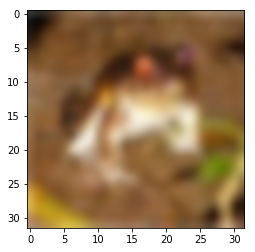

In [26]:
plt.imshow(x_train[0], interpolation='bicubic')

In [27]:
y_train[10]

array([4], dtype=uint8)

In [28]:
y_train.shape  # can find actual labels at cs.toronto.edu/~kriz/cifar.html

(50000, 1)

In [37]:
from keras.utils import to_categorical
from keras.layers import Flatten, Dense

In [30]:
x_train = x_train.astype('float32')
x_train /= 255

In [33]:
x_test = x_test.astype('float32')
x_test /= 255

In [35]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [36]:
y_train.shape

(50000, 10)

In [38]:
model = Sequential()

model.add(Conv2D(32, kernel_size=(3,3), activation='relu', padding='same', input_shape=(32,32,3)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu', padding='same'))
model.add(Conv2D(64, (3,3), activation='relu'))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.2))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [39]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 16, 16, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 16, 16, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 16, 16, 64)        18496     
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 14, 14, 64)        36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 7, 7, 64)          0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 7, 7, 64)          0         
__________

In [40]:
from keras.optimizers import rmsprop

In [41]:
opt = rmsprop(lr=0.0001, decay=1e-6)

In [42]:
model.compile(optimizer=opt,
             loss='categorical_crossentropy',
             metrics=['accuracy'])

In [ ]:
model.fit(x_train, y_train, batch_size=32, epochs=10, validation_data=(x_test, y_test))